In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import date
import math

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Single\\"
salt = "MgSO4"
building_id = 5
pricing = 'Fixed'
case_SA = 'Low'

In [10]:
# Read building data:
load = pd.read_excel(ResultsFolder + "Results_includeTES_True_"+case_SA+"_"+pricing+"_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="load")
load = load.rename(columns={'Unnamed: 0': 'Hour'})
temp = pd.read_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\weather\\ext_temp_Detroit.xlsx")
load['Outdoor Temp'] = temp['temp']

tes_discharge = pd.read_excel(ResultsFolder + "Results_includeTES_True_"+case_SA+"_"+pricing+"_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l = pd.read_excel(ResultsFolder + "Results_includeTES_True_"+case_SA+"_"+pricing+"_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec = pd.read_excel(ResultsFolder + "Results_includeTES_True_"+case_SA+"_"+pricing+"_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

load['TES Discharge (kWh)'] = tes_discharge['TES discharge (kWh)']
load['HP to load (kWh)'] = hp_l['HP output to load (kWh)']
load['HP to TES (kWh)'] = hp_l['HP output to TES (kWh)']
load['Purchased Electricity (kWh)'] = pur_elec['Unnamed: 1']
load['SOC'] = tes_discharge['TES SOC (kWh)']/(math.ceil(load['Load (kWh)'].max())/0.281267306*0.75)
load = load.reset_index()
load['hour'] = load['index'] + 1

idxmax, valmax = load['Load (kWh)'].agg(['idxmax', 'max'])
load

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),HP to TES (kWh),Purchased Electricity (kWh),SOC,hour
0,0,hour 1,18.226712,-16.719999,0.000000,18.226712,0.000000,14.092966,0.000000e+00,1
1,1,hour 2,16.987938,-16.719999,0.000000,16.987938,0.000000,13.135141,0.000000e+00,2
2,2,hour 3,17.211558,-16.719999,0.000000,17.211558,0.000000,13.308045,0.000000e+00,3
3,3,hour 4,17.015076,-15.610000,0.000000,17.015076,0.995494,9.790033,1.333333e-02,4
4,4,hour 5,17.024729,-15.000000,0.000000,17.024729,0.995494,8.878666,2.666667e-02,5
...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,5.000000,0.000215,10.926943,0.000000,3.104245,2.881837e-06,8756
8756,8756,hour 8757,10.946176,5.000000,0.000106,10.946070,0.000000,3.109679,1.426364e-06,8757
8757,8757,hour 8758,11.004044,6.110000,0.000053,11.003991,0.000000,3.046172,7.059779e-07,8758
8758,8758,hour 8759,11.873651,8.890000,0.000026,11.873625,0.000000,3.085982,3.494234e-07,8759


In [11]:
# Graphing:
mon_to_run = 1
year = 2018

if mon_to_run == 'Year':
    day = 365                                   # Equivalent days
    starting_day = 0
else:
    day = monthrange(year, mon_to_run)[1]       # number of days in specified month
    starting_day = (date(year, mon_to_run, 1) - date(year, 1, 1)).days

hour = day * 24
#starting_hour = starting_day * 24
#end_hour = starting_hour + hour
starting_hour = int(idxmax) - 168/2
end_hour = int(idxmax) + 168/2

# Get COP:
load_cop50_raw = pd.read_excel('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\cop_temp.xlsx', sheet_name='cop NEEP50')
load['COP'] = 0.000

for i in list(range(len(load['Outdoor Temp']))):
    load_cop50_raw['temp_diff'] = abs(load['Outdoor Temp'][i] - load_cop50_raw['temp C'])
    min_id50 = load_cop50_raw['temp_diff'].idxmin(axis=0)
    load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])
load

C:\Users\atpha\AppData\Local\Temp\ipykernel_6828\3814631147.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),HP to TES (kWh),Purchased Electricity (kWh),SOC,hour,COP
0,0,hour 1,18.226712,-16.719999,0.000000,18.226712,0.000000,14.092966,0.000000e+00,1,1.293320
1,1,hour 2,16.987938,-16.719999,0.000000,16.987938,0.000000,13.135141,0.000000e+00,2,1.293320
2,2,hour 3,17.211558,-16.719999,0.000000,17.211558,0.000000,13.308045,0.000000e+00,3,1.293320
3,3,hour 4,17.015076,-15.610000,0.000000,17.015076,0.995494,9.790033,1.333333e-02,4,1.839684
4,4,hour 5,17.024729,-15.000000,0.000000,17.024729,0.995494,8.878666,2.666667e-02,5,2.029609
...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,5.000000,0.000215,10.926943,0.000000,3.104245,2.881837e-06,8756,3.520000
8756,8756,hour 8757,10.946176,5.000000,0.000106,10.946070,0.000000,3.109679,1.426364e-06,8757,3.520000
8757,8757,hour 8758,11.004044,6.110000,0.000053,11.003991,0.000000,3.046172,7.059779e-07,8758,3.612400
8758,8758,hour 8759,11.873651,8.890000,0.000026,11.873625,0.000000,3.085982,3.494234e-07,8759,3.847600


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),HP to TES (kWh),Purchased Electricity (kWh),SOC,hour,COP
41,41,hour 42,15.153540,-15.000000,0.995494,14.158046,0.000000,6.975749,0.325988,42,2.029609
42,42,hour 43,16.083519,-15.610000,0.995494,15.088024,0.000000,8.201420,0.312383,43,1.839684
43,43,hour 44,16.926188,-16.110001,0.995494,15.930694,0.000000,9.674944,0.298778,44,1.646593
44,44,hour 45,17.487432,-16.110001,0.995494,16.491937,0.000000,10.015795,0.285172,45,1.646593
45,45,hour 46,17.672383,-16.719999,0.995494,16.676889,0.000000,12.894637,0.271567,46,1.293320
...,...,...,...,...,...,...,...,...,...,...,...
205,205,hour 206,17.602722,2.780000,0.000000,17.602722,0.995494,5.576342,0.268027,206,3.335200
206,206,hour 207,17.415667,1.720000,0.000000,17.415667,0.995494,5.677551,0.281361,207,3.242800
207,207,hour 208,17.580820,1.720000,0.000000,17.580820,0.995494,5.728480,0.294694,208,3.242800
208,208,hour 209,17.955856,1.110000,0.000000,17.955856,0.995494,5.936396,0.308027,209,3.192400


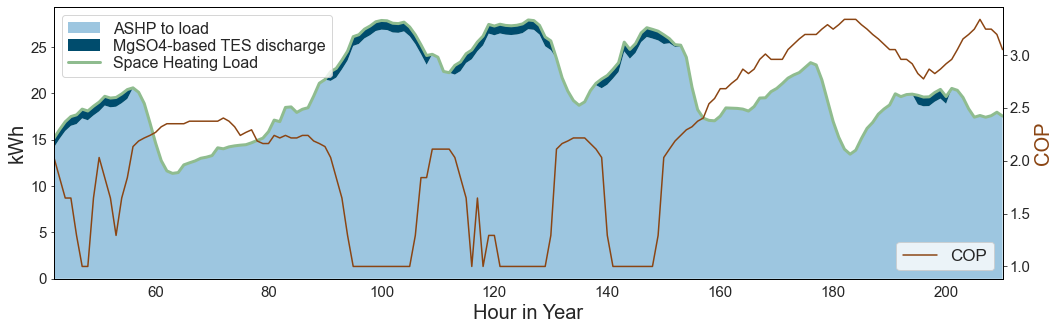

In [12]:
load_truncated = load.truncate(before=starting_hour, after=end_hour)
import seaborn as sns
colors = ["#9dc6e0", "#004c6d"]
sns.set_style(style='white')
labels=["ASHP to load", salt+"-based TES discharge"]

fig, ax1 = plt.subplots(figsize=(17,5))
plt.stackplot(load_truncated['hour'], load_truncated['HP to load (kWh)'], load_truncated['TES Discharge (kWh)'], labels=labels, colors=colors, edgecolor = "none")
#plt.plot(load_truncated['hour'], load_truncated['HP to TES (kWh)'], label = "MgSO4-based TES charging", color='darkolivegreen')
plt.plot(load_truncated['hour'], load_truncated['Load (kWh)'], label = "Space Heating Load",linewidth=3, color='darkseagreen')
plt.legend(loc='upper left', labelspacing=0.14, fontsize=16)
plt.xlabel("Hour in Year",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("kWh", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.xlim(load_truncated['hour'].min(),load_truncated['hour'].max())

ax2 = ax1.twinx()
ax2.plot(load_truncated['hour'], load_truncated['COP'], label = "COP", color='saddlebrown')
#ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp", color='orange',linewidth=3)
plt.ylabel("COP", fontsize=20, color='saddlebrown')
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=17)

if case_SA == 'Peak':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_discharge_SA_peak.png', dpi=300,bbox_inches='tight')
elif case_SA == 'Average':
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_discharge_SA_avg.png', dpi=300,bbox_inches='tight')
else:
    fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/tes_discharge_SA_low.png', dpi=300,bbox_inches='tight')

tes_discharge_trun = load_truncated['TES Discharge (kWh)'].sum()
load_trun = load_truncated['Load (kWh)'].sum()
tes_pct = tes_discharge_trun/load_trun
load_truncated

In [52]:
load_truncated

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),HP to TES (kWh),Purchased Electricity (kWh),SOC,hour,COP
41,41,hour 42,15.153540,-15.000000,0.000000,15.153540,0.465103,7.695393,7.062852,42,2.029609
42,42,hour 43,16.083519,-15.610000,0.000000,16.083519,0.339177,8.926909,7.095152,43,1.839684
43,43,hour 44,16.926188,-16.110001,0.000000,16.926188,0.158391,10.375715,7.110236,44,1.646593
44,44,hour 45,17.487432,-16.110001,0.000000,17.487432,0.000000,10.620373,7.110236,45,1.646593
45,45,hour 46,17.672383,-16.719999,7.340717,10.331667,0.000000,7.988486,6.396896,46,1.293320
...,...,...,...,...,...,...,...,...,...,...,...
205,205,hour 206,17.602722,2.780000,0.000000,17.602722,10.299415,8.365956,3.493666,206,3.335200
206,206,hour 207,17.415667,1.720000,0.000000,17.415667,10.486470,8.604335,4.492316,207,3.242800
207,207,hour 208,17.580820,1.720000,0.000000,17.580820,7.647281,7.779728,5.220584,208,3.242800
208,208,hour 209,17.955856,1.110000,0.000000,17.955856,5.576796,7.371461,5.751674,209,3.192400


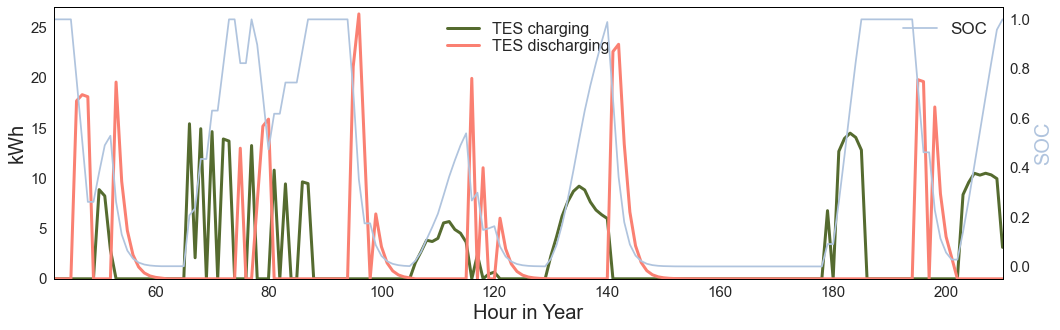

In [26]:
# Graphing charging vs discharging:
fig, ax1 = plt.subplots(figsize=(17,5))
plt.plot(load_truncated['hour'], load_truncated['HP to TES (kWh)'], label = "TES charging",linewidth=3, color='darkolivegreen')
plt.plot(load_truncated['hour'], load_truncated['TES Discharge (kWh)'], label = "TES discharging",linewidth=3, color='salmon')
plt.legend(loc='upper center', labelspacing=0.14, fontsize=16)
plt.xlabel("Hour in Year",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("kWh", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.xlim(load_truncated['hour'].min(),load_truncated['hour'].max())
plt.ylim(0,27)

ax2 = ax1.twinx()
ax2.plot(load_truncated['hour'], load_truncated['SOC'], label = "SOC", color='lightsteelblue')
#ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp", color='orange',linewidth=3)
plt.ylabel("SOC", fontsize=20, color='lightsteelblue')
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=17)
